### Cell2Cell Churn Management Assignment

This case requires you to develop a model for predicting customer churn at "Cell2Cell," a fictitious wireless telecom company and use insights from the model to develop an incentive plan for enticing would-be churners to remain with Cell2Cell.

The data for the case is a scaled down version of the full database generously donated by an anonymous wireless telephone company. There are still 71,047 customers in the database, and over 65 potential predictors. Logistic regression is the best choice to develop your predictive model.

This case requires both statistical analysis and creativity/judgment. I recommend you not spend too much time fine-tuning your predictive model; make sure you spend enough time interpreting and using the results to come up with your plan.


In [1]:
# Import libraries and dependencies

import pandas as pd
import mba263
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the data

data = pd.read_csv('cell2cell.csv')

In [3]:
# Browse the data

# Run >> data.describe()

In [4]:
data_calibration = data[data['calibrat']==1]

In [5]:
data_validation = data[data['calibrat']==0]

In [6]:
# Churn rate in calibration set
# Run >> data_calibration['churn'].describe()

In [7]:
# Out of 40000, there are 50% churns or 20000 churns
print(f"Total churn in calibration set is {round(40000*0.5,0)}")

Total churn in calibration set is 20000.0


In [8]:
# Churn rate in validation set
# Run >> data_validation['churn'].describe()

In [9]:
# Out of 31047, there are 1.96% churn or 609 churns
print(f"Total churn in validation set is {round(31047*0.019615,0)}")

Total churn in validation set is 609.0


In [10]:
# Run >> data_calibration.head()

### Which variables are significant in explaining y?

In [11]:
# varlist = data_calibration.drop(columns = ['customer','churn','calibrat','churndep']).copy()

varlist=['revenue','mou','recchrge','overage','roam','changem','changer','unansvce','custcare',
         'threeway','incalls','peakvce','months','uniqsubs','actvsubs','phones','eqpdays','age1',
         'children','credita','creditaa','refurb','webcap','marryun','newcelly','income','setprcm',
         'setprc','retcall']

In [12]:
# result_calibration_logit = mba263.logit(data_calibration['churn'], varlist)

res = mba263.logit(data_calibration['churn'], data_calibration[varlist])

Optimization terminated successfully.
         Current function value: 0.672791
         Iterations 5


### Predict on calibration sample

In [13]:
# data_calibration['predchurn'] = result_calibration_logit.predict(varlist)

data_calibration['predchurn'] = res.predict(data_calibration[varlist])

data_calibration['predchurn'].head()

31047    0.767634
31048    0.301454
31049    0.237737
31050    0.505983
31051    0.393218
Name: predchurn, dtype: float64

In [14]:
data_calibration['grading'] = 10 - mba263.ntile(data_calibration['predchurn'],10)

<AxesSubplot:xlabel='grading'>

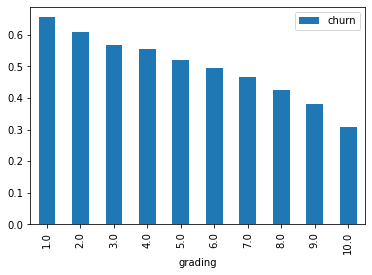

In [15]:
data_calibration[['grading','churn']].groupby('grading').mean().plot(kind = 'bar')

### Predict out of sample

In [16]:
# varlist_for_validation = data_validation.drop(columns = ['customer','churn','calibrat','churndep']).copy()

In [17]:
# result_calibration_logit

In [18]:
# data_validation['predchurn'] = result_calibration_logit.predict(varlist_for_validation)

In [19]:
data_validation['predchurn'] = res.predict(data_validation[varlist])

In [20]:
data_validation['predchurn'].head()

0    0.240254
1    0.201140
2    0.349795
3    0.306109
4    0.344468
Name: predchurn, dtype: float64

In [21]:
data_validation['predchurn'].mean()

0.47811691141450274

In [22]:
data_validation['churn'].mean()

0.019615421779882115

### Segmentation

In [23]:
data_validation['grading'] = 10 - mba263.ntile(data_validation['predchurn'],10)

In [24]:
data_validation['grading'].head(7)

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5     4.0
6     7.0
Name: grading, dtype: float64

### Performance out of sample

<AxesSubplot:xlabel='grading'>

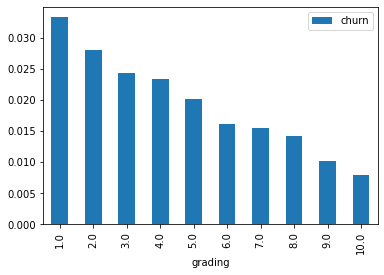

In [25]:
data_validation[['grading','churn']].groupby('grading').mean().plot(kind = 'bar')

<AxesSubplot:xlabel='grading'>

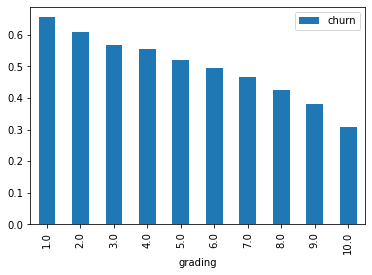

In [26]:
data_calibration[['grading','churn']].groupby('grading').mean().plot(kind = 'bar')

In [27]:
gain_calibration = mba263.gain(data_calibration['churn'],data_calibration['predchurn'],10)
gain_validation = mba263.gain(data_validation['churn'],data_validation['predchurn'],10)

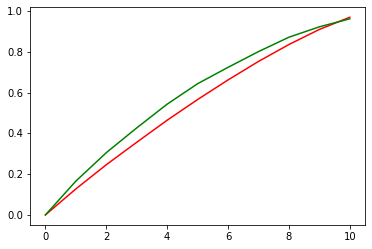

In [28]:
plt.plot(gain_calibration,'r')
plt.plot(gain_validation,'g')

### Use model to understand main drivers of churn

#### Odds ratios

In [29]:
mba263.odds_ratios(res)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
revenue,1.002028,0.000778,2.605834,0.009,1.000518,1.003539
mou,0.999794,0.000040,5.155826,0.000,0.999717,0.999872
recchrge,0.996746,0.000867,3.751492,0.000,0.995063,0.998429
overage,1.000748,0.000273,2.740765,0.006,1.000219,1.001278
roam,1.007515,0.002075,3.620857,0.000,1.003488,1.011541
changem,0.999488,0.000053,9.644086,0.000,0.999385,0.999591
changer,1.002328,0.000369,6.304964,0.000,1.001611,1.003044
unansvce,1.001212,0.000409,2.959391,0.003,1.000417,1.002006
custcare,0.994638,0.002489,2.154270,0.031,0.989808,0.999467
threeway,0.980656,0.010632,1.819481,0.069,0.960031,1.001281


### Scaling factors

In [30]:
x_std = data_validation[varlist].std()
x_std

revenue      44.372524
mou         536.601264
recchrge     24.149383
overage      93.803961
roam          9.965017
changem     249.550642
changer      37.459479
unansvce     39.718928
custcare      5.140100
threeway      1.264254
incalls      16.395990
peakvce     107.365881
months        9.992800
uniqsubs      0.838612
actvsubs      0.626597
phones        1.356318
eqpdays     250.214987
age1         22.107739
children      0.427026
credita       0.310342
creditaa      0.348835
refurb        0.339606
webcap        0.281835
marryun       0.485459
newcelly      0.394457
income        3.127723
setprcm       0.497041
setprc       57.561782
retcall       0.158540
dtype: float64

### Pull odds ratios

In [31]:
odds_ratios = mba263.odds_ratios(res)['Odds ratios']
odds_ratios

revenue     1.002028
mou         0.999794
recchrge    0.996746
overage     1.000748
roam        1.007515
changem     0.999488
changer     1.002328
unansvce    1.001212
custcare    0.994638
threeway    0.980656
incalls     0.998188
peakvce     0.999683
months      0.978631
uniqsubs    1.203819
actvsubs    0.811330
phones      1.056282
eqpdays     1.001433
age1        0.996107
children    1.083032
credita     0.845865
creditaa    0.702216
refurb      1.264262
webcap      0.852334
marryun     1.072694
newcelly    0.931863
income      0.993206
setprcm     0.899380
setprc      1.000586
retcall     2.097093
Name: Odds ratios, dtype: float64

### Normalize

In [32]:
normalized_odds_ratios = np.power(odds_ratios, x_std)

In [33]:
normalized_odds_ratios

revenue     1.094082
mou         0.895548
recchrge    0.924300
overage     1.072682
roam        1.077457
changem     0.880071
changer     1.090994
unansvce    1.049275
custcare    0.972741
threeway    0.975607
incalls     0.970698
peakvce     0.966565
months      0.805856
uniqsubs    1.168314
actvsubs    0.877210
phones      1.077092
eqpdays     1.430890
age1        0.917373
children    1.034648
credita     0.949377
creditaa    0.883982
refurb      1.082890
webcap      0.955968
marryun     1.034653
newcelly    0.972547
income      0.978903
setprcm     0.948654
setprc      1.034279
retcall     1.124577
dtype: float64

### Reverse and rank

In [34]:
normalized_odds_ratios[normalized_odds_ratios < 1] = 1 / normalized_odds_ratios[normalized_odds_ratios < 1]

In [35]:
normalized_odds_ratios.sort_values(ascending = False)

eqpdays     1.430890
months      1.240917
uniqsubs    1.168314
actvsubs    1.139978
changem     1.136272
creditaa    1.131245
retcall     1.124577
mou         1.116635
revenue     1.094082
changer     1.090994
age1        1.090070
refurb      1.082890
recchrge    1.081899
roam        1.077457
phones      1.077092
overage     1.072682
setprcm     1.054125
credita     1.053323
unansvce    1.049275
webcap      1.046060
marryun     1.034653
children    1.034648
peakvce     1.034591
setprc      1.034279
incalls     1.030187
newcelly    1.028228
custcare    1.028023
threeway    1.025003
income      1.021552
dtype: float64

In [36]:
# Run >> result_calibration_logit.summary()

In [37]:
# Choose the variables that have P-value less than 0.05
# significant_variables=['revenue','mou','recchrge','overage','roam','changem','changer','unansvce','custcare',
#                       'threeway','incalls','peakvce','months','uniqsubs','actvsubs','phones','eqpdays','age1',
#                       'children','credita','creditaa','refurb','webcap','marryun','newcelly','income','setprcm',
#                       'setprc','retcall']

In [38]:
# x_new_calibration=x_calibration[significant_variables] 

In [39]:
# result_new_calibration_logit = mba263.logit(y_calibration, x_new_calibration)

In [40]:
# Run >> result_new_calibration_logit.summary()

#### 1. Briefly describe your predictive churn model. How did you select variables to be included in the model?

Eliminate the variables that have p-value < 0.05 in the initial stage.

In [41]:
# x_new_calibration['predchurn'] = result_new_calibration_logit.predict(x_new_calibration)

In [42]:
# x_new_calibration['predchurn'].head()

In [43]:
# x_new_calibration['grading']=10-mba263.ntile(x_new_calibration['predchurn'],10)

In [44]:
# x_new_calibration['grading'],y_calibration.groupby('grading').mean().plot()
# x_new_calibration

In [45]:
# x_new_calibration['grading']